### PROJECT OVERVIEW;

Identifying customer that are susceptibale to churn and enhance a retentation strategy in other to boost productivity;
the primary objective of this project is to develop a predictive model that will identify customer churn through historical data to leverage and boost the performance of this models. 

## BUSSINESS PROBLEM;

No doubt, the telcom industries is a competative industry where customers only pledge their loyalty to the best high-quality rendering services companies where they can get value for their money. In recent times Reder telcom company one of the leading telcom company in that region is faced with churn risk which threaten their continous operation as a telcom company;

## Some of the problems faced by reder telcom company is as follow;

* Intence competition from the many competitors market.
* changing customers needs because of their needs for personalized and high-quality services.
* Pricing pressure which affects marketing has made it difficult to maintain and sustain competition from competitors.
* Network quality and performance which influences customers satisfaction, and the dis-satisfaction leads to customer churn.
* Difficulties in building and maintain customer loyalty.

### RATIONALE OF THE PROJECT;

Churn prediction is a strategy that uses customer data to identify those who are least likely to renew their contacts or subscriptions, this project will initiate a comprehensive strategy to address the afforementined challenges in Reder telcom company and also enalbe them to build a robust and high quality services to their customers in other to sustain their operation as a telcom oprator.

### OBJECTIVES OF THE PROJECT
* To develop  predictive models in other to identify the customers at the risk of churning.
* To analyze the key factors contributing to churn.

In [1]:
## libraries for data manupulation, mathematical computation, EDA's

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ast import literal_eval


from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# importing the data set

reder_data = pd.read_excel(r'C:\Users\Sirmiky\Downloads\Dataset.xlsx')
reder_data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


## Descriptive Statistics of the Data set

In [9]:
# more info about the data set
reder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [8]:
# shape of the data
reder_data.shape

(12483, 21)

In [11]:
# checking for missing data
reder_data.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [12]:
# more statistics of the data set
reder_data.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


In [13]:
reder_data.describe(include='object')

,Name,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,Timestamp
count,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483,12483
unique,11617,2,9255,12138,12483,12483,3,12483,12472,12467,6173,6248,12483,90,12483,12479,12482
top,Michael Johnson,Male,Lake Michael,wsmith@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment C,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Pro', 'Start_Date': '2022-11-09', 'E...","[{'Type': 'Call', 'Date': '2020-03-26'}]","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 85, 'TimeSpent(minutes)': 3}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 1, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2022-12-26', 'Email_Opened': ...",2020-10-21 06:44:42
freq,6,6269,17,5,1,1,4199,1,2,2,42,9,1,167,1,2,2


In [15]:
# checking for duplicate value

reder_data.duplicated().sum()

0

In [18]:
reder_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

##  Eploratory Data Analysis

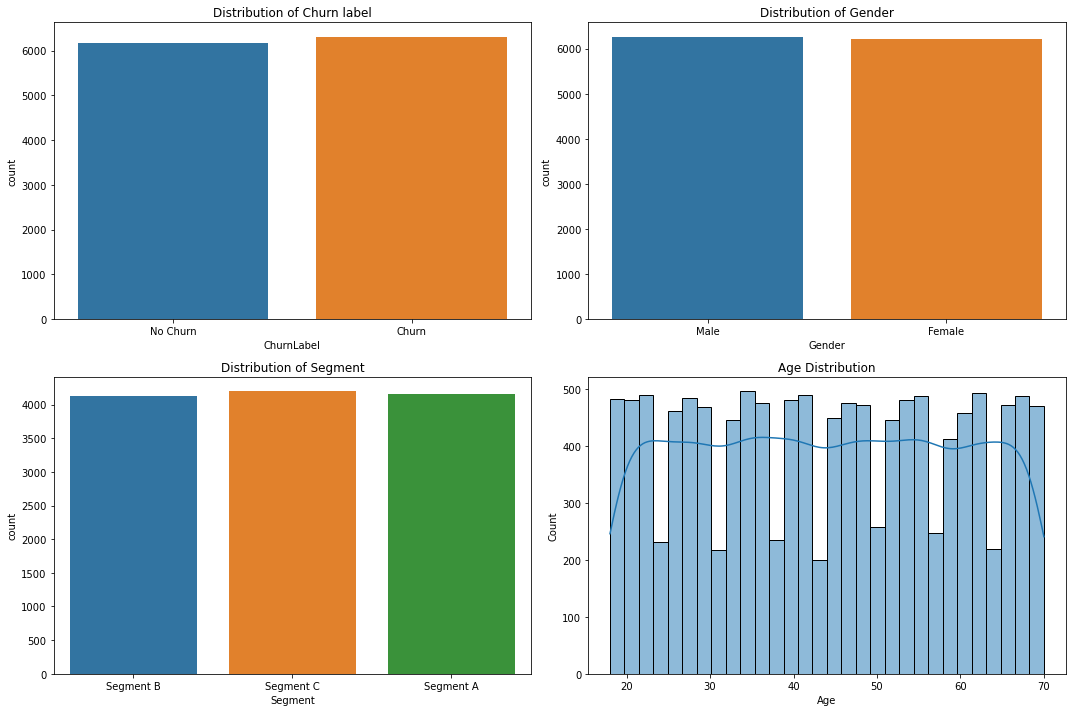

In [16]:
# seting of axis
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

# distribution of churn label
sns.countplot(x = 'ChurnLabel', data = reder_data, ax = ax[0,0])
ax[0,0].set_title('Distribution of Churn label')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])


## distribution of gender
sns.countplot(x='Gender', data=reder_data,ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

## Distribution of segments
sns.countplot(x='Segment', data=reder_data,ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# Age Distribution
sns.histplot(reder_data['Age'],bins=30, ax=ax[1,1],kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

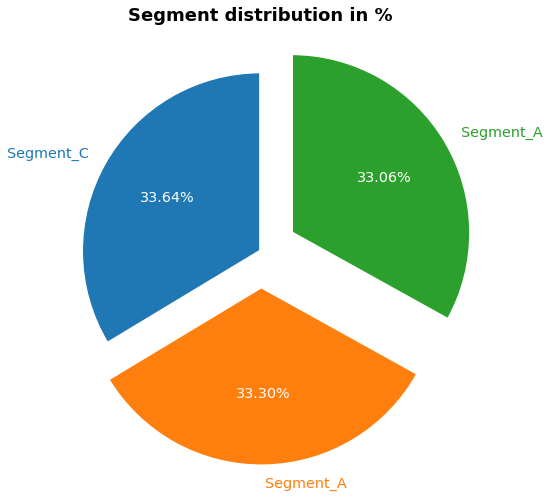

In [8]:
fig, ax=plt.subplots(figsize=(8,7))

labels = ['Segment_C','Segment_A', 'Segment_A']
x = [ 4199,4157,4127]

patches,texts,pct = ax.pie(x, labels=labels, autopct ='%.2f%%',
                          wedgeprops={'linewidth':3.0, 'edgecolor':'white'},textprops={'size':'x-large'},
                           explode=(0,0.2,0.2),
                          startangle=90)
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(texts, fontweight=200)
ax.set_title('Segment distribution in %', fontsize=18, fontweight='bold')
plt.setp(pct, color='white')
plt.tight_layout()
plt.show()

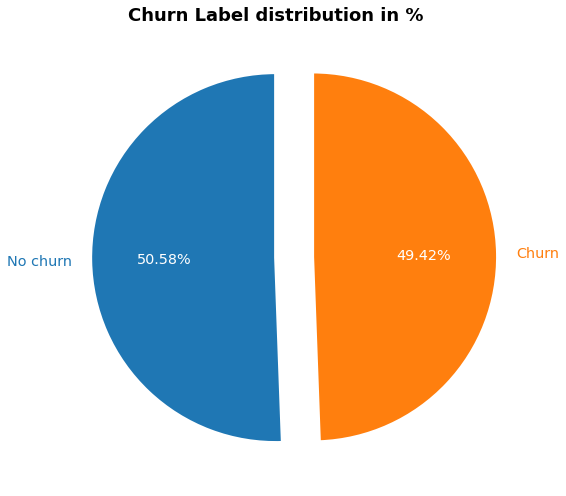

In [10]:
fig, ax=plt.subplots(figsize=(8,7))

labels = ['No churn', 'Churn']
x = [ 6314,6169]

patches,texts,pct = ax.pie(x, labels=labels, autopct ='%.2f%%',
                          wedgeprops={'linewidth':3.0, 'edgecolor':'white'},textprops={'size':'x-large'},
                           explode=(0,0.2),
                          startangle=90)
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(texts, fontweight=200)
ax.set_title('Churn Label distribution in %', fontsize=18, fontweight='bold')
plt.setp(pct, color='white')
plt.tight_layout()
plt.show()

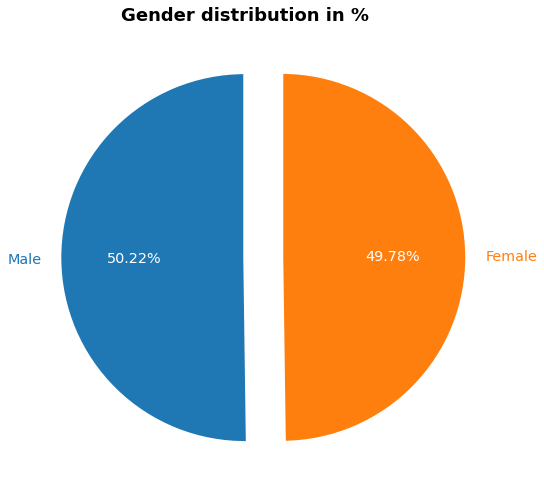

In [4]:
fig, ax=plt.subplots(figsize=(8,7))

labels = ['Male','Female']
x = [ 6269,6214]

patches,texts,pct = ax.pie(x, labels=labels, autopct ='%.2f%%',
                          wedgeprops={'linewidth':3.0, 'edgecolor':'white'},textprops={'size':'x-large'},
                           explode=(0,0.2),
                          startangle=90)
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(texts, fontweight=200)
ax.set_title('Gender distribution in %', fontsize=18, fontweight='bold')
plt.setp(pct, color='white')
plt.tight_layout()
plt.show()

### Correletion basically shows relationships between numerical columns in a data set

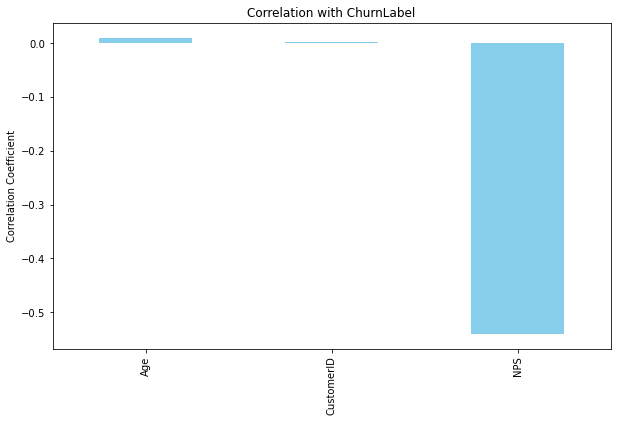

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [17]:
# Calculate correlation with ChurLabel 
correlatoin =reder_data.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlatoin
plt.figure(figsize=(10, 6))
correlatoin.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlatoin


In [19]:
# Exploring the nested columns


nested_col = [
    'PurchaseHistory',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
    
]


# print out values in each of the nested columns

w1, w2  = 50, 1000

for col in nested_col:
    row = [col, reder_data[col][0]]
    
    print('\n|{:<{w1}}| {:<{w2}}|' .format(*row, w1=w1, w2=w2))
    
    
    


|PurchaseHistory                                   | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## takng a look how the churn rate changes over time

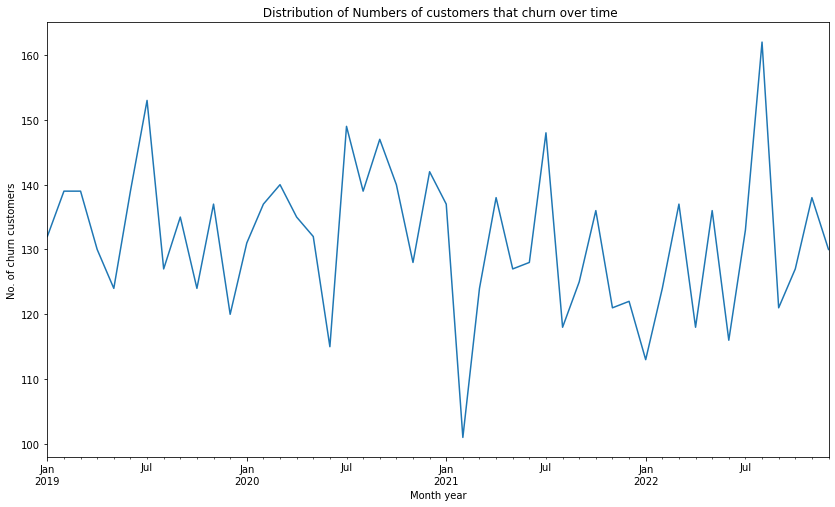

In [20]:
reder_data['Timestamp'] = pd.to_datetime(reder_data['Timestamp'])


# now extract the months and year from the time stamp

reder_data['MonthYear']= reder_data['Timestamp'].dt. to_period('M')


# group by monthly churn rate and calculate the sum

monthly_churn_rate = reder_data.groupby('MonthYear')['ChurnLabel'].sum()

# now plot tje churn rate

plt.figure(figsize=(14,8))
monthly_churn_rate.plot()
plt.title(' Distribution of Numbers of customers that churn over time')
plt.ylabel('No. of churn customers')
plt.xlabel('Month year')
plt.show()

## Exploring the customers feedback rating and its effects on the churn label

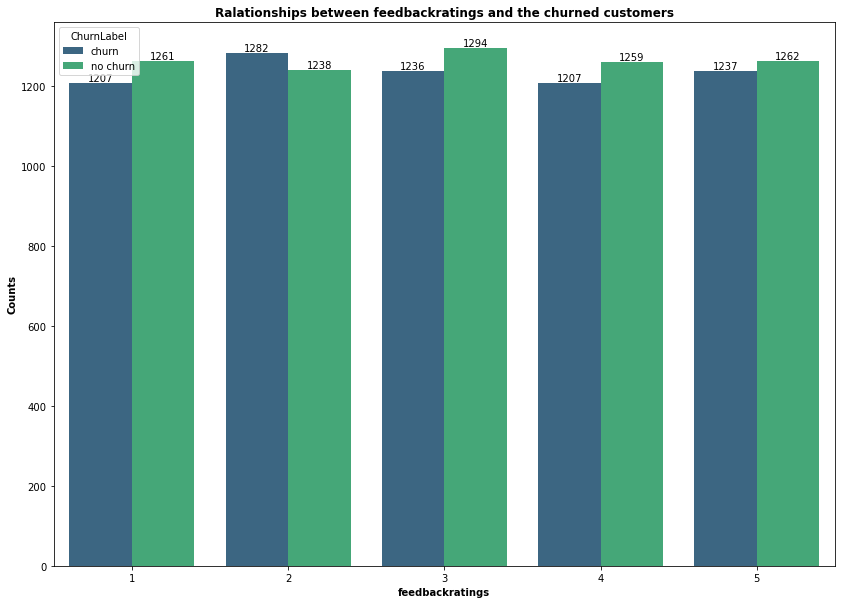

In [7]:
reder_data['FeedBackRatings'] = reder_data['Feedback'].apply(lambda x: eval(x)['Rating'])


#  ploting the  relationships of the ratings in a count plot
plt.figure(figsize=(14,10))
ax=sns.countplot(x='FeedBackRatings',hue='ChurnLabel',data = reder_data, palette = 'viridis')
for j in ax.containers:
    ax.bar_label(j)
plt.title('Ralationships between feedbackratings and the churned customers',fontsize=12,fontweight='bold')
plt.xlabel('feedbackratings',fontweight='bold')
plt.ylabel('Counts',fontweight='bold')


plt.legend(title= 'ChurnLabel', loc = 'upper left',labels = ['churn', 'no churn'])

## Exploring the nested columns to create more columns

In [15]:
# list nested column

nested_colu = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]


# # Applying the literal_eval function to convert the nested values from string formats to list

for feature in nested_colu:
    reder_data[feature]= reder_data[feature].apply(literal_eval)
    

In [16]:
# PurchaseHistory
reder_data['PurchasedProducts'] = reder_data['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
reder_data['PurchaseFrequency'] = reder_data['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
reder_data['PurchaseValue'] = reder_data['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# Subscription Details
reder_data['SubscriptionPlan'] = reder_data['SubscriptionDetails'].apply(lambda x: x['Plan'])
reder_data['SubscriptionStartDate'] = reder_data['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
reder_data['SubscriptionEndDate'] = reder_data['SubscriptionDetails'].apply(lambda x: x['End_Date'])
reder_data['SubscriptionDuration'] = (pd.to_datetime(reder_data['SubscriptionEndDate']) - pd.to_datetime(reder_data['SubscriptionStartDate'])).dt.days

# WebsiteUsage
reder_data['WebsitePageViews'] = reder_data['WebsiteUsage'].apply(lambda x: x['PageViews'])
reder_data['WebsiteTimeSpent'] = reder_data['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
reder_data['EngagementMetricsLogins'] = reder_data['EngagementMetrics'].apply(lambda x: x['Logins'])
reder_data['EngagementMetricsFrequency'] = reder_data['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
reder_data['FeedbackRating'] = reder_data['Feedback'].apply(lambda x: x['Rating'])
reder_data['FeedbackComment'] = reder_data['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
reder_data['MarketingCommunicationNoOfEmails'] = reder_data['MarketingCommunication'].apply(lambda x: len(x))
reder_data['MarketingCommunicationOpenClickDiff'] = reder_data['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
reder_data['MarketingCommunicationSentOpenDiff'] = reder_data['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

In [17]:
# view the new col. in the dateframe

reder_data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,FeedbackComment,MarketingCommunicationNoOfEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,871,49,15,19,Weekly,1,I move baby go small big. Office institution s...,8,319.0,818.0
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,290,100,9,9,Weekly,2,Wish what bag cut life. Statement might opport...,9,88.0,110.0
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,319,1,97,19,Monthly,4,Some Democrat guess but short. Whether behind ...,8,117.0,333.0
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,803,25,31,4,Daily,1,Yard feel never miss ask billion Congress. Fly...,10,423.0,159.0
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,580,77,51,12,Weekly,3,Ten determine unit interview challenge stock. ...,7,96.0,193.0


In [18]:
service_interaction_types = reder_data['ServiceInteractions'].apply(lambda x :list(set(i['Type'] for i in x)))
service_interaction_types= service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = reder_data['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_data_actions = reder_data['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))

print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)

All unique Service Interaction Types: ['Chat', 'Email', 'Call']
All unique Payment History Methods: ['Credit Card', 'PayPal', 'Bank Transfer']
All unique Clickstream Data Actions: ['Add to Cart', 'Click', 'Search']


In [20]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    reder_data[f'ServiceInteractions_{usit}'] = reder_data['ServiceInteractions'].apply(lambda x: len([i for i in x if i  ['Type'] == usit]))

# PaymentHistory
reder_data['PaymentHistoryNoOfLatePayments'] = reder_data['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
reder_data['PaymentHistoryAvgNoOfLatePayments'] = reder_data['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    reder_data[f'ClickStreamData_{ucda}'] = reder_data['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

In [13]:
# pre_view the data frame again

reder_data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Chat,ServiceInteractions_Call,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,4,8,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,5,10,10,3.333333,9,8,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,3,2,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,17,18,79,26.333333,16,15,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,4,5,2,0.666667,9,17,4


In [21]:
# entire columns  of the data frame

reder_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp',
       'PurchasedProducts', 'PurchaseFrequency', 'PurchaseValue',
       'SubscriptionPlan', 'SubscriptionStartDate', 'SubscriptionEndDate',
       'SubscriptionDuration', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'FeedbackRating', 'FeedbackComment', 'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Add to Cart', 'ClickSt

In [22]:
#  pick the columns that will be used for  model
tel =reder_data[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
]]


tel.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


In [23]:
# see the names of the columns present now

reder_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp',
       'PurchasedProducts', 'PurchaseFrequency', 'PurchaseValue',
       'SubscriptionPlan', 'SubscriptionStartDate', 'SubscriptionEndDate',
       'SubscriptionDuration', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'FeedbackRating', 'FeedbackComment', 'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Add to Cart', 'ClickSt

In [17]:
# see the first value from each of the columns

tel.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

In [18]:
print('Total dataset length:' , len(tel))

tel[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()



Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

## Encoding

In [24]:

# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoding, since this has a high length of value, we will be using a for loop
unique_subscription_plans = tel['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding, since this has a high length of value, we will be using a for loop
unique_engagement_frequency = tel['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode and convert data types
tel.loc[:, 'Gender'] = tel.loc[:, 'Gender'].map(gender_map)
tel.loc[:, 'SubscriptionPlan'] = tel.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
tel.loc[:, 'EngagementMetricsFrequency'] = tel.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)


In [25]:
# view the data frame again


tel.loc[0]

Age                                      31.00
Gender                                    0.00
NPS                                       3.00
ChurnLabel                                1.00
PurchaseFrequency                        38.00
PurchaseValue                          3994.72
SubscriptionPlan                          0.00
WebsitePageViews                         49.00
WebsiteTimeSpent                         15.00
EngagementMetricsLogins                  19.00
EngagementMetricsFrequency                0.00
FeedbackRating                            1.00
MarketingCommunicationNoOfEmails          8.00
MarketingCommunicationOpenClickDiff     319.00
MarketingCommunicationSentOpenDiff      818.00
ServiceInteractions_Call                  1.00
ServiceInteractions_Email                 1.00
ServiceInteractions_Chat                  2.00
PaymentHistoryNoOfLatePayments           40.00
ClickStreamData_Click                     4.00
ClickStreamData_Add to Cart               8.00
ClickStreamDa

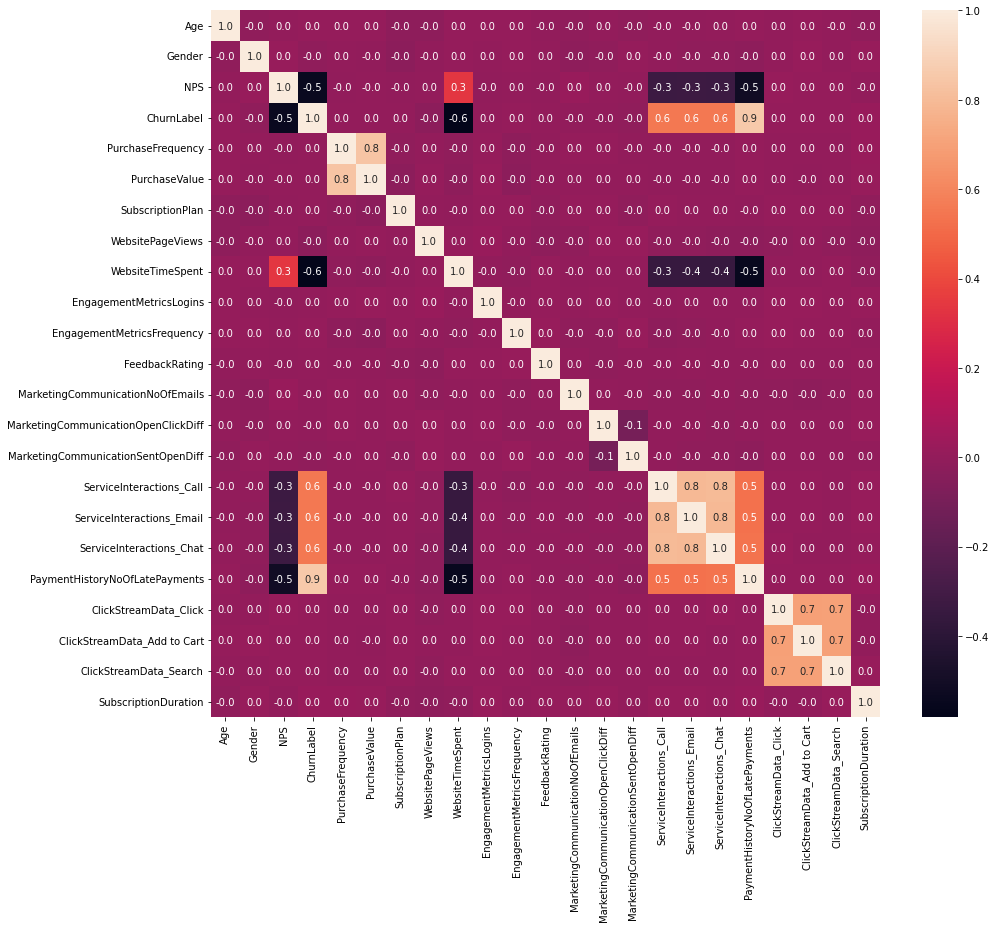

In [26]:
#  plot a correlation matrix to see one feature affects another

telcorr = tel.corr()
fig, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(telcorr, annot=True, fmt='.1f', ax=ax)
plt.show()


In [27]:
# sliting of data into train and test split


# Splitting the data
x = tel.drop(columns=['ChurnLabel'])
y = tel['ChurnLabel']

# First split to get training set and the rest
x_train, x_other, y_train, y_other = train_test_split(x, y, train_size=0.8, random_state=42)

# Second split to get test and validation sets
x_val, x_test, y_val, y_test = train_test_split(x_other, y_other, test_size=0.3, random_state=42)


In [28]:
# scaling of the data

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)

## Modelling

### Two different models for modelling:

#### *LogicRegression
#### *DecisionTreeClassifier


## Metrics:

#### *Accuracy score
#### *Precision score
#### *Recall score F1 score.

In [29]:
# define a function that would be use to evaluate the metrics above

def evaluate(X,y, model, subset=''):
    y_pred = model.predict(X)

# printing the subset of the metrics

    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

## Modelling with LogisticsRegression

In [30]:
# Build the model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(x_train, y_train, lr, 'Train')
print('--------------------------------')
evaluate(x_val, y_val, lr, 'Validation')


Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962
--------------------------------
Validation Accuracy Score: 0.9690898683457355
Validation Precision Score: 0.9644495412844036
Validation Recall Score: 0.9733796296296297
Validation F1 Score: 0.9688940092165897


## Modellng with DecisionTreeClassifier

In [31]:
# Build the model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Evaluate on train and validation subsets
evaluate(x_train, y_train, dt, subset='Train')
print('---------------------------------------')
evaluate(x_val, y_val, dt, subset='Validation')

Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train F1 Score: 1.0
---------------------------------------
Validation Accuracy Score: 0.9393245563823698
Validation Precision Score: 0.9357798165137615
Validation Recall Score: 0.9422632794457275
Validation F1 Score: 0.9390103567318757


In [32]:
# using max-depth
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

# Evaluate on train and validation subsets
evaluate(x_train, y_train, dt, subset='Train')
print('---------------------------------------------')
evaluate(x_val, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335302
---------------------------------------------
Validation Accuracy Score: 0.9736691471093303
Validation Precision Score: 0.9736238532110092
Validation Recall Score: 0.9736238532110092
Validation F1 Score: 0.9736238532110092


# Evaluating for test set;

In [33]:
evaluate(x_test, y_test, lr, 'LogisticRegression Test')

print('-----------------------------------------------------')
evaluate(x_test, y_test, dt, 'DecisionTreeClassifier Test')


LogisticRegression Test Accuracy Score: 0.968
LogisticRegression Test Precision Score: 0.9696969696969697
LogisticRegression Test Recall Score: 0.9643835616438357
LogisticRegression Test F1 Score: 0.967032967032967
-----------------------------------------------------
DecisionTreeClassifier Test Accuracy Score: 0.9693333333333334
DecisionTreeClassifier Test Precision Score: 0.9724517906336089
DecisionTreeClassifier Test Recall Score: 0.9644808743169399
DecisionTreeClassifier Test F1 Score: 0.9684499314128944


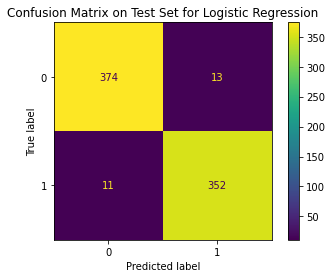

In [34]:
# the prediction and ploting of the confusion matrix
# for logistic regression

lr_y_pred = lr.predict(x_test)
Logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=Logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

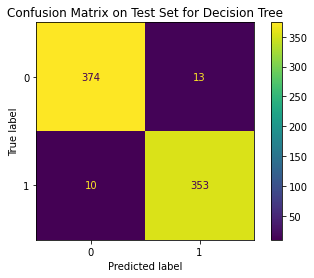

In [35]:
# ploting the matrix for decision tree

dt_y_pred = dt.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()


## Conclusion
### below are some of the columns that helps in determining if a customer will churn or not
- The number of service interactions the customer has had through Call. Email and Chat
- The number of times the customer has made Late Payments
- The time spent on the company's website
- The net Promoter Score (NPS).